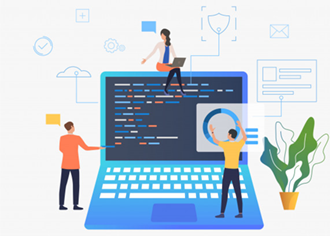

**TRABAJO FINAL**

**Participantes**
1. Diego Fernando Londoño - Cédula : 71364074
2. Yenny Patricia Vergara - Cédula : 43917150
3. Carlos Adrián Niño - Cédula : 8127211
4. Luis Hincapie Martinez - Cédula : 1038417207

**Contexto**

Para nuestro ejercicio, tomamos como fuente una data de 24484 registros, el informe obedece al comportamiento, atención y gestión
de incidentes, solicitudes de servicio y quejas de TI de una compañía en el periodo correspondiente al año 2024,
esta información detalla en 9 columnas datos como: número de ticket, tipo de caso, fecha creación, fecha cierre, sede del usuario afectado,
grupo responsable de la solución, así como algunos campos que sirven para la medición de indicadores de atención del área de TI como: casos vencidos, rechazados y nivel de satisfacción

[Ir al ejecutable](https://colab.research.google.com/drive/1RDriWzNLsKpa9LTtGEUNzK_2G9Blh1-U#scrollTo=a043e451-7ac6-480f-ad95-de9a9f81860f)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

1. Exportamos en DataFrame requerido para el ejercicio

In [ ]:
url = "https://raw.githubusercontent.com/ferdilo04/Datos_Analitica/refs/heads/master/dataset.csv"
df = pd.read_csv(url)
df

,CASO,TIPOCASO,FECHACREADO,FECHAPORAPROBAR,SEDEUSUARIO,NOMBREGRUPORESOLUTOR,VENCIDO,RECHAZADO,SATISFACCION,CASO.1
0,SR4115530,SR,2024-09-03,2024-09-06,MEALS DE COLOMBIA - BOGOTA - PLANTA HELADOS,SOPORTE TECNICO A USUARIOS,No,No,0,1
1,SR3793906,SR,2024-02-13,2024-02-14,MEALS DE COLOMBIA - PASTO - MULTICOMPANIA,SOPORTE TECNICO A USUARIOS,No,No,0,1
2,SR3842604,SR,2024-03-12,2024-03-12,MEALS DE COLOMBIA - PASTO - MULTICOMPANIA,SOPORTE TECNICO A USUARIOS,No,No,0,1
3,SR3844621,SR,2024-03-13,2024-03-13,MEALS DE COLOMBIA - PASTO - MULTICOMPANIA,SOPORTE TECNICO A USUARIOS,No,No,0,1
4,SR3798095,SR,2024-02-15,2024-02-15,ALIMENTOS CARNICOS - AGUACHICA- PLANTA CARNICOS,SOPORTE TECNICO A USUARIOS,No,No,5,1
...,...,...,...,...,...,...,...,...,...,...
26479,SR3886359,SR,2024-04-14,2024-04-16,SERVICIOS NUTRESA - MEDELLIN- PLANTA NOEL,NaN,No,No,0,1
26480,SR3765214,SR,2024-01-25,2024-01-25,GC FOODS SANTA MARTA,SOPORTE TECNICO A USUARIOS,No,No,5,1
26481,SR3777368,SR,2024-02-02,2024-02-02,GC FOODS SANTA MARTA,SOPORTE TECNICO A USUARIOS,No,No,5,1
26482,SR3933022,SR,2024-05-10,2024-05-21,ALIMENTOS CARNICOS - MEDELLIN - MULTICOMPANIA ...,CONECTIVIDAD TI CABLEADO EP INGENIERIA,No,No,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26484 entries, 0 to 26483
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CASO                  26484 non-null  object
 1   TIPOCASO              26484 non-null  object
 2   FECHACREADO           26484 non-null  object
 3   FECHAPORAPROBAR       26484 non-null  object
 4   SEDEUSUARIO           26484 non-null  object
 5   NOMBREGRUPORESOLUTOR  25214 non-null  object
 6   VENCIDO               26484 non-null  object
 7   RECHAZADO             26484 non-null  object
 8   SATISFACCION          26484 non-null  int64 
 9   CASO.1                26484 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.0+ MB


2. A continuación, convertimos los tipos de datos del dataset:

In [ ]:
df['FECHACREADO'] = pd.to_datetime(df['FECHACREADO'], format = "%Y-%m-%d")
df['FECHAPORAPROBAR'] = pd.to_datetime(df['FECHAPORAPROBAR'], format = "%Y-%m-%d")
df['CASO'] = df['CASO'].astype('string')
df['TIPOCASO'] = df['TIPOCASO'].astype('string')
df['SEDEUSUARIO'] = df['SEDEUSUARIO'].astype('string')
df['NOMBREGRUPORESOLUTOR'] = df['NOMBREGRUPORESOLUTOR'].astype('string')
df['VENCIDO'] = df['VENCIDO'].astype('string')
df['RECHAZADO'] = df['RECHAZADO'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26484 entries, 0 to 26483
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CASO                  26484 non-null  string        
 1   TIPOCASO              26484 non-null  string        
 2   FECHACREADO           26484 non-null  datetime64[ns]
 3   FECHAPORAPROBAR       26484 non-null  datetime64[ns]
 4   SEDEUSUARIO           26484 non-null  string        
 5   NOMBREGRUPORESOLUTOR  25214 non-null  string        
 6   VENCIDO               26484 non-null  string        
 7   RECHAZADO             26484 non-null  string        
 8   SATISFACCION          26484 non-null  int64         
 9   CASO.1                26484 non-null  int64         
dtypes: datetime64[ns](2), int64(2), string(6)
memory usage: 2.0 MB


3. Agregamos nuevas columnas como: año, mes y día creado, así como: año, mes y día cerrado, necesarios para el análisis

In [ ]:
df['AÑO_CREADO'] = df['FECHACREADO'].dt.year
df['MES_CREADO'] = df['FECHACREADO'].dt.month
df['DIA_CREADO'] = df['FECHACREADO'].dt.day
df['AÑO_CERRADO'] = df['FECHAPORAPROBAR'].dt.year
df['MES_CERRADO'] = df['FECHAPORAPROBAR'].dt.month
df['DIA_CERRADO'] = df['FECHAPORAPROBAR'].dt.day

df = df.sort_values(by='FECHACREADO', ascending=True)
df.set_index('FECHACREADO', inplace = True)
df.head(5)

,CASO,TIPOCASO,FECHAPORAPROBAR,SEDEUSUARIO,NOMBREGRUPORESOLUTOR,VENCIDO,RECHAZADO,SATISFACCION,CASO.1,AÑO_CREADO,MES_CREADO,DIA_CREADO,AÑO_CERRADO,MES_CERRADO,DIA_CERRADO
FECHACREADO,,,,,,,,,,,,,,,
2023-02-02,SR3127770,SR,2024-03-03,COMPANIA DE GALLETAS POZUELO - COSTA RICA- PLANTA,COMUNICACIONES Y REDES (COSTA RICA),No,No,0,1,2023,2,2,2024,3,3
2023-02-22,SR3172933,SR,2024-03-12,COMPANIA DE GALLETAS POZUELO - COSTA RICA- PLANTA,COMUNICACIONES Y REDES (COSTA RICA),No,No,4,1,2023,2,22,2024,3,12
2023-03-21,SR3242528,SR,2024-07-12,SERVICIOS NUTRESA - MEDELLIN- PLANTA NOEL,<NA>,No,No,0,1,2023,3,21,2024,7,12
2023-03-29,SR3258688,SR,2024-02-02,NOVAVENTA - MEDELLIN- MULTICOMPANIA GUAYABAL,SEGURIDAD TI KYNDRYL,No,No,0,1,2023,3,29,2024,2,2
2023-03-31,SR3265044,SR,2024-03-05,COMPANIA DE GALLETAS POZUELO - COSTA RICA- PLANTA,COMUNICACIONES Y REDES (COSTA RICA),No,No,0,1,2023,3,31,2024,3,5


4. Creamos una función con la que buscamos poner valor "SIN GRUPO RESOLUTOR" a los campos vacíos de la columna de Grupo Resolutor que no tengan registro

In [ ]:
def ManejoFaltantes():
  #Manejo de valores faltantes
  df['SATISFACCION'] = df['SATISFACCION'].replace(0, 5)
  df['NOMBREGRUPORESOLUTOR'] = df['NOMBREGRUPORESOLUTOR'].fillna('SIN GRUPO RESOLUTOR')
  df.head()
  return df

In [ ]:
ManejoFaltantes()

,CASO,TIPOCASO,FECHAPORAPROBAR,SEDEUSUARIO,NOMBREGRUPORESOLUTOR,VENCIDO,RECHAZADO,SATISFACCION,CASO.1,AÑO_CREADO,MES_CREADO,DIA_CREADO,AÑO_CERRADO,MES_CERRADO,DIA_CERRADO
FECHACREADO,,,,,,,,,,,,,,,
2023-02-02,SR3127770,SR,2024-03-03,COMPANIA DE GALLETAS POZUELO - COSTA RICA- PLANTA,COMUNICACIONES Y REDES (COSTA RICA),No,No,5,1,2023,2,2,2024,3,3
2023-02-22,SR3172933,SR,2024-03-12,COMPANIA DE GALLETAS POZUELO - COSTA RICA- PLANTA,COMUNICACIONES Y REDES (COSTA RICA),No,No,4,1,2023,2,22,2024,3,12
2023-03-21,SR3242528,SR,2024-07-12,SERVICIOS NUTRESA - MEDELLIN- PLANTA NOEL,SIN GRUPO RESOLUTOR,No,No,5,1,2023,3,21,2024,7,12
2023-03-29,SR3258688,SR,2024-02-02,NOVAVENTA - MEDELLIN- MULTICOMPANIA GUAYABAL,SEGURIDAD TI KYNDRYL,No,No,5,1,2023,3,29,2024,2,2
2023-03-31,SR3265044,SR,2024-03-05,COMPANIA DE GALLETAS POZUELO - COSTA RICA- PLANTA,COMUNICACIONES Y REDES (COSTA RICA),No,No,5,1,2023,3,31,2024,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,SR4292684,SR,2024-12-31,LA RECETTA SOLUCIONES GASTRONOMICAS INTEGRADAS...,CONTROL GESTION TI ABASTECIMIENTO,No,No,5,1,2024,12,31,2024,12,31
2024-12-31,SR4292672,SR,2024-12-31,ALIMENTOS CARNICOS - MEDELLIN - MULTICOMPANIA ...,CONTROL GESTION TI ABASTECIMIENTO,No,No,5,1,2024,12,31,2024,12,31
2024-12-31,SR4292596,SR,2024-12-31,PASTAS COMARRICO - BARRANQUILLA - PLANTA,CONTROL GESTION TI ABASTECIMIENTO,No,No,5,1,2024,12,31,2024,12,31


5. Definimos una función, que nos permite generar nuestra primera gráfica, que detalla el comportamiento de los tipos de casos

In [ ]:
def GraficaPorTiposdeCasos():
  #Grafica de tipos de casos
  df_agroup = df.groupby("TIPOCASO", as_index = False)["CASO"].count()
  sns.catplot(x ='TIPOCASO',
              y = 'CASO',
              kind = 'bar',
              data = df_agroup)

  plt.title('Gestión por tipos de casos')

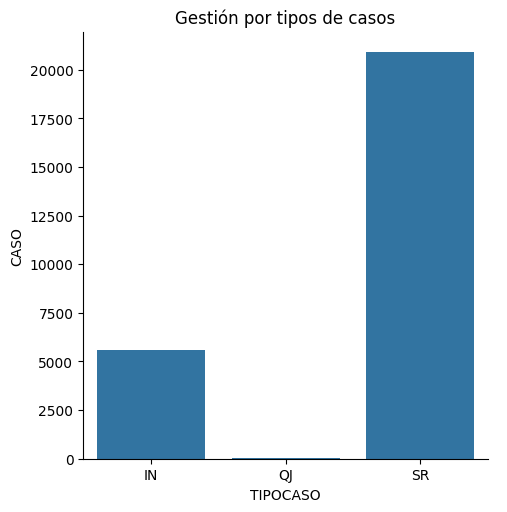

In [ ]:
GraficaPorTiposdeCasos()

6. La siguiente función, nos genera una gráfica que nos muestra el comportamiento de atención de tickets, en los diferentes meses del año

In [ ]:
def GraficasPorMeses():
  #Grafica por meses para el año 2024
  df_agroup = df[df['AÑO_CREADO'] == 2024].groupby("MES_CREADO", as_index = False)["CASO"].count()
  sns.catplot(x ='MES_CREADO',
              y = 'CASO',
              kind = 'bar',
              data = df_agroup)
  plt.title('Gestión casos x mes')

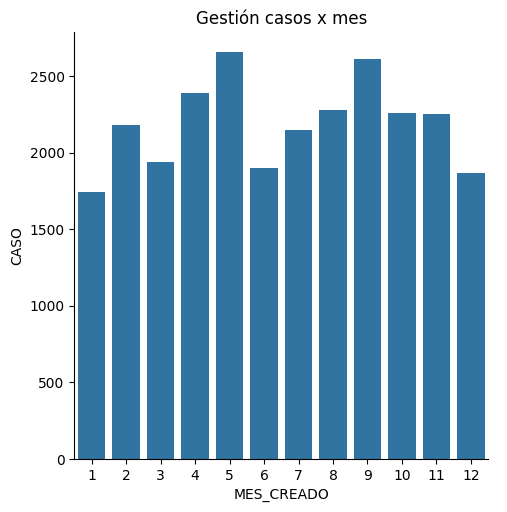

In [ ]:
GraficasPorMeses()

7. Agrupamos los tipos de casos, según su comportamiento mes a mes

Text(0.5, 1.0, 'Gestión de casos x mes x tipo')

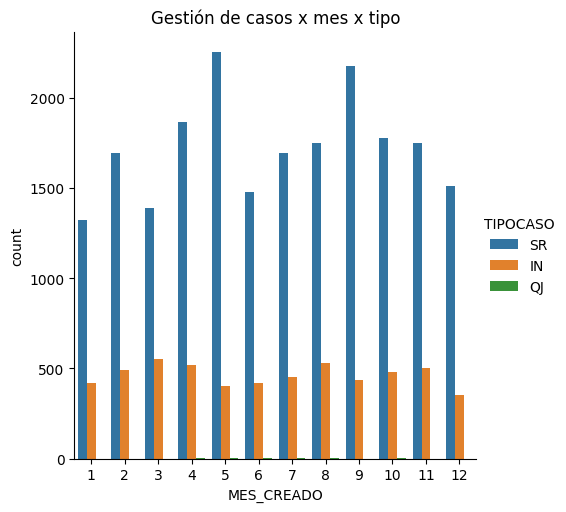

In [ ]:
 sns.catplot(data = df[df['AÑO_CREADO'] == 2024], x = 'MES_CREADO', kind = 'count', hue = 'TIPOCASO');
 plt.title('Gestión de casos x mes x tipo')

8. Mostramos a través de una gráfica, cuál es el top de Grupos Resolutores

In [ ]:
def GraficaTipGruposResolutores():
  #Grafica del top 10 GRUPO RESOLUTOR
  df_agroup = df[df['AÑO_CREADO'] == 2024].groupby("NOMBREGRUPORESOLUTOR", as_index = False)["CASO"].count()
  df_sorted = df_agroup.sort_values(by='CASO', ascending=False)  # Ordenar
  df_top = df_sorted.head(10)
  sns.catplot(x ='NOMBREGRUPORESOLUTOR',
              y = 'CASO',
              kind = 'bar',
              data = df_top)
  plt.xticks(rotation = 90);
  plt.title('Top 10 x grupos resolutores')

In [ ]:
grupos_resolutores = df['NOMBREGRUPORESOLUTOR'].nunique()
grupos_resolutores

75

Una vez identificamos la cantidad de grupos resolutores tomamos el top 10 como muestra

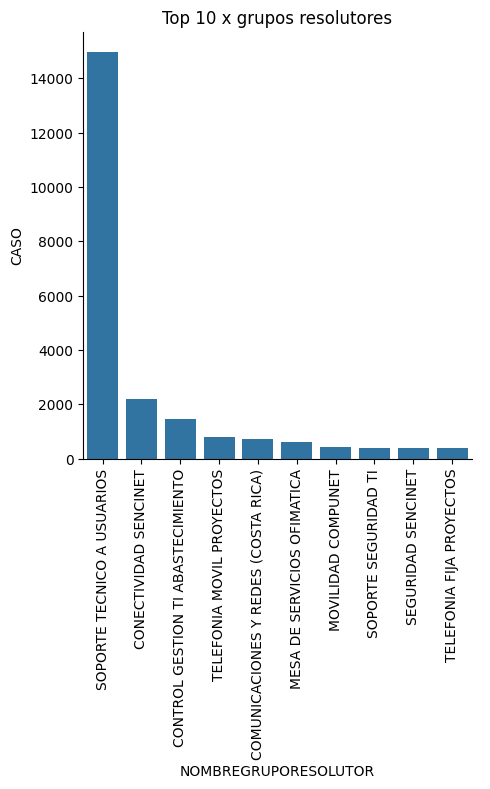

In [ ]:
GraficaTipGruposResolutores()

9. La siguiente gráfica nos muestra la calificación o nivel de satisfacción obtenido por los usuarios cuando su caso fue atendido

In [ ]:
def PromedioSatisfacionGruposResolutores():
  #Satisfaccion promedio de los casos por el top 10
  df_agroup = df[df['AÑO_CREADO'] == 2024].groupby("NOMBREGRUPORESOLUTOR", as_index = False)["CASO"].count()
  df_sorted = df_agroup.sort_values(by='CASO', ascending=False).head(10)  # Ordenar
  df_agroup = df[df['NOMBREGRUPORESOLUTOR'].isin(df_sorted['NOMBREGRUPORESOLUTOR'])].groupby("NOMBREGRUPORESOLUTOR", as_index = False)["SATISFACCION"].mean()
  sns.catplot(x ='NOMBREGRUPORESOLUTOR',
              y = 'SATISFACCION',
              kind = 'bar',
              data = df_agroup)
  plt.xticks(rotation = 90);
  plt.title('Top 10 promedio satisfacción x grupos resolutores')

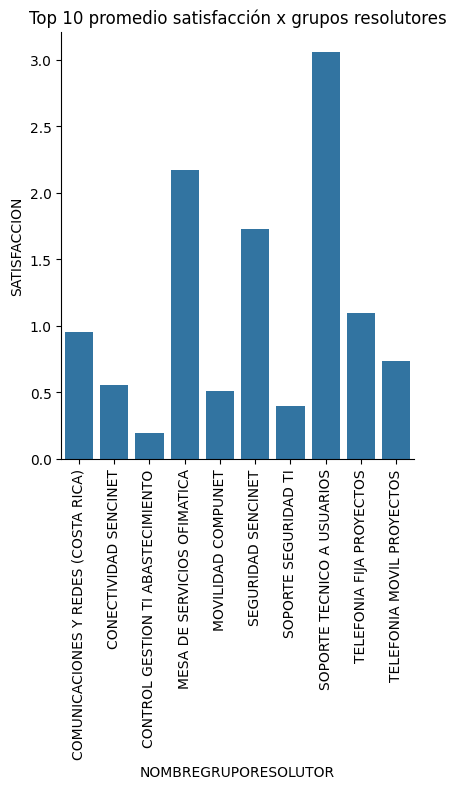

In [ ]:
PromedioSatisfacionGruposResolutores()

10. Detallamos en la siguiente tabla el número de casos atendidos por grupo resolutor

In [ ]:
def ResolutoresConMasCasos():
  #Informacion de grupo resolutor que mas casos atiende
  df_agroup = df[df['AÑO_CREADO'] == 2024].groupby("NOMBREGRUPORESOLUTOR", as_index = False)["CASO"].count()
  df_sorted = df_agroup.sort_values(by='CASO', ascending=False)  # Ordenar
  df_sorted.head(1)
  return df_sorted

In [ ]:
ResolutoresConMasCasos()

,NOMBREGRUPORESOLUTOR,CASO
71,SOPORTE TECNICO A USUARIOS,14964
18,CONECTIVIDAD SENCINET,2178
24,CONTROL GESTION TI ABASTECIMIENTO,1462
73,TELEFONIA MOVIL PROYECTOS,813
17,COMUNICACIONES Y REDES (COSTA RICA),731
...,...,...
1,ACO CONCILIACIONES,1
61,SOLUCIONES DE T.I. COMERCIALES,1
60,SOLUCIONES TI LOGISTICA MM COMPRAS ARIBA,1
59,SOLUCIONES DE T.I. DE DHO,1


11. Promedio de solucion en horas por mes

In [ ]:
def GraficasTiemposolucionMeses():
  #Grafica por meses con tiempos de solucion
  url = "https://raw.githubusercontent.com/ferdilo04/Datos_Analitica/refs/heads/master/dataset.csv"
  df = pd.read_csv(url)

  # Convertir a tipo fecha
  df['FECHACREADO'] = pd.to_datetime(df['FECHACREADO'])
  df['FECHAPORAPROBAR'] = pd.to_datetime(df['FECHAPORAPROBAR'])
  df['AÑO_CREADO'] = df['FECHACREADO'].dt.year
  df['MES_CREADO'] = df['FECHACREADO'].dt.month

  # Calcular la diferencia en días
  df['DIFERENCIADIAS'] = (df['FECHAPORAPROBAR'] - df['FECHACREADO']).dt.days

  df = df.sort_values(by='FECHACREADO', ascending=True)
  df.set_index('FECHACREADO', inplace = True)

  #calculo del maximo de dias por mes
  df_agroup = df[df['AÑO_CREADO'] == 2024].groupby("MES_CREADO", as_index = False)["DIFERENCIADIAS"].max()
  print("Mayor dia de solución por mes")
  print(df_agroup)

  df_agroup = df[df['AÑO_CREADO'] == 2024].groupby("MES_CREADO", as_index = False)["DIFERENCIADIAS"].mean()
  sns.catplot(x ='MES_CREADO',
              y = 'DIFERENCIADIAS',
              kind = 'bar',
              data = df_agroup)
  plt.title('Tiempo promedio de solución en días x mes')


Mayor dia de solución por mes
    MES_CREADO  DIFERENCIADIAS
0            1             293
1            2             317
2            3             296
3            4             245
4            5             215
5            6             171
6            7             171
7            8             141
8            9              98
9           10              76
10          11              49
11          12              24


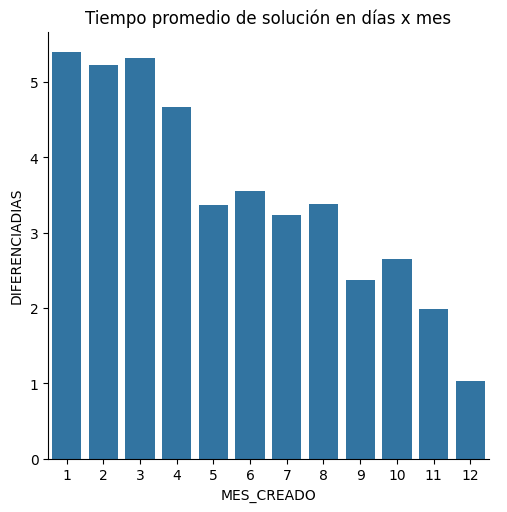

In [ ]:
GraficasTiemposolucionMeses()

12. En esta gráfica, nos ocupamos de, según el comportamiento y atención mensual de casos durante el 2024, realizar una predicción del comportamiento y gestión de los servicios para el 2025

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


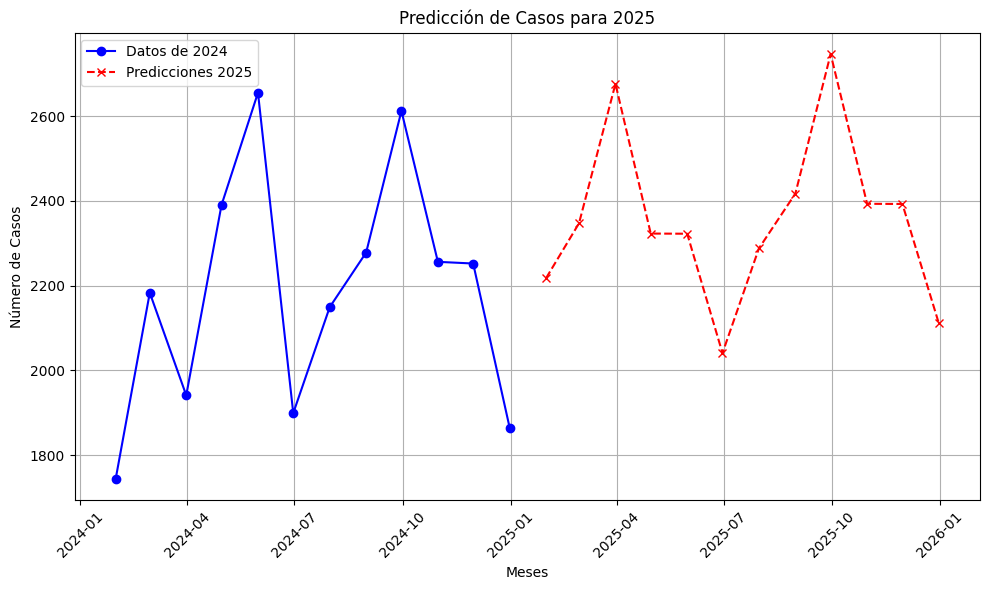

In [ ]:
def ModelarPredicciones2025(url, year_prediccion=2025, year_base=2024):
    # Cargar el DataFrame
    df = pd.read_csv(url)

    # Convertir la fecha
    df['FECHACREADO'] = pd.to_datetime(df['FECHACREADO'], format="%Y-%m-%d")

    # Agregar columna de año y mes de creación
    df['AÑO_CREADO'] = df['FECHACREADO'].dt.year
    df['MES_CREADO'] = df['FECHACREADO'].dt.month

    # Agrupar por mes y contar casos para el año base (2024)
    df_agroup = df[df['AÑO_CREADO'] == year_base].groupby("MES_CREADO", as_index=False)["CASO"].count()
    df_agroup.set_index('MES_CREADO', inplace=True)

    # Definir el rango de fechas para el gráfico
    fecha_base = pd.date_range(start=f"{year_base}-01-01", periods=12, freq='ME')  # Cambiado de 'M' a 'ME'

    # Crear un DataFrame con las fechas y valores de casos
    df_base = pd.DataFrame({'Fecha': fecha_base, 'Valor': df_agroup['CASO']})
    df_base.set_index('Fecha', inplace=True)

    # Modelar el año 2025
    model = ExponentialSmoothing(df_base['Valor'], trend='add', seasonal='add', seasonal_periods=6)
    fit = model.fit()

    # Realizar predicciones para los próximos 12 meses (2025)
    predicciones = fit.forecast(12)

    # Crear gráfico
    plt.figure(figsize=(10,6))

    # Gráfico de los datos del año base (2024)
    plt.plot(df_base.index, df_base['Valor'], label=f"Datos de {year_base}", color='blue', marker='o')

    # Gráfico de las predicciones para el año de predicción (2025)
    predicciones_dates = pd.date_range(start=f"{year_prediccion}-01-01", periods=12, freq='ME')  # Cambiado de 'M' a 'ME'
    plt.plot(predicciones_dates, predicciones, label=f"Predicciones {year_prediccion}", color='red', linestyle='--', marker='x')

    # Configuración de la gráfica
    plt.title(f'Predicción de Casos para {year_prediccion}')
    plt.xlabel('Meses')
    plt.ylabel('Número de Casos')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()

# Llamar a la función con la URL del dataset y el año de predicción
url = "https://raw.githubusercontent.com/ferdilo04/Datos_Analitica/refs/heads/master/dataset.csv"
ModelarPredicciones2025(url, year_prediccion=2025)

**Oportunidades de mejora**





1.   Sabemos que hay equipos que trabajan más que otros, es importante categorizar el caso para poder identificar por casuística las necesidades más demandadas por los usuarios, las prioritarias y los SLAs
2.   Adicionar tiempos de solución por tipo de servicio para poder calcular los tiempos estimados Vs los tiempos reales
3.   Promover la calificación para obtener datos reales que nos ayuden a descubir la insataisfación
4.   Utilizar varios modelos de predicción para obtener datos mas precisos, como por ejemplo el modelo  SARIMA (Seasonal ARIMA) o modelos de redes neuronales recurrentes (RNN)
5. Se debe asegurar que en la data que exista siempre un grupo resolutor o propietario del caso





**Conclusiones**




1.   Es importate según la gráfica mensual de caso considerar los picos para atender oportunamente la demanda de atención, considerando que los incidentes tienen un comportamiento similar a las solicitudes de servicio.
2.   En la gráfica del top 10 de resolutores podemos observar que el grupo resolutor "Soporte técnico de usuarios" esta muy por encima de los demas, pero haciendo un análisis detallado descubrimos que por los tipos de servicio los otros grupos resoluores como por ejemplo "Proyectos" atienden casos que en tiempos son mucho mayores que los que atienden los de soporte.
3.   Las predicciones para 2025 proporcionan una buena estimación de la cantidad de casos que pueden ser esperados en los próximos meses, lo cual es clave para la planificación de recursos en la mesa de servicio. Las predicciones para el año siguiente, nos pueden servir como base para preparar a los grupos resolutores y el personal de atención para la carga de trabajo que se anticipa en el futuro cercano.










